In [1]:
# import lab
import pandas as pd
import numpy as np
import seaborn as sns


# Data 

In [2]:
# read file
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survival	Survival	                                  0 = No, 1 = Yes
pclass	    Ticket class	                              1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	                           C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
# make PassengerID become index
train_df = pd.read_csv("train.csv", index_col = "PassengerId")
test_df = pd.read_csv("test.csv", index_col = "PassengerId")

- age, cabin and embarked have missing value
- name, sex, ticket canbin and emberked is object, need to encoding to numerical.
- categorical: survived, sex, embarked, Pclass, SibSP, Parch

In [6]:
# look into the variables
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
#change the Dtype to category
train_df["Survived"] = train_df["Survived"].astype("category")

change_features = ["Pclass","Sex", "SibSp","Parch", "Embarked"]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, change_features)
convert_cat(test_df, change_features)

In [8]:
# describe numerical variables
    train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
# describe these categorical variables
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# ANALYSIS

In [10]:
train_df["Survived"].value_counts(normalize = True).to_frame()

,Survived
0,0.616162
1,0.383838


- ti le song sot khong can bang nhung khong qua lech
- tuong tu ti le nam nu cung co su chenh lech 

- ti le song sot cua nu cao hon han nam 
- hang nhat co ti le song sot cao hon
- nhung nguoi khong co SibSp hau nhu khong the song sot, co 1 den 2 SibSp 
- khong co Parch gan nhu khong the song sot

In [11]:
train_df["Sex"].value_counts(normalize = True).to_frame()

,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Age', ylabel='Count'>

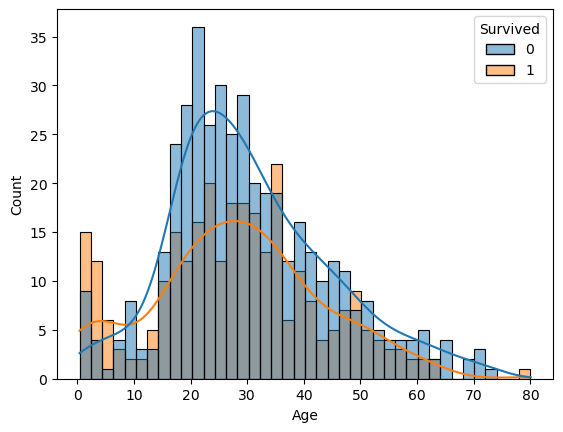

In [12]:
sns.histplot(data=train_df, x='Age', hue = 'Survived',bins=40, kde=True)

- da phan hanh khach nam trong do tuoi tu 18 den 40
- tre em co ti le song sot cao hon han 

<Axes: xlabel='Fare', ylabel='Count'>

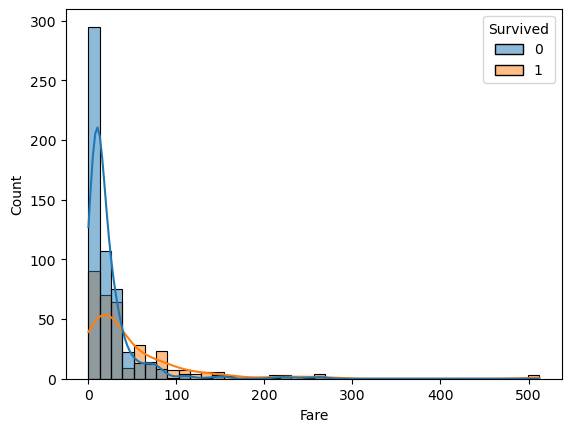

In [13]:
sns.histplot(data=train_df, x='Fare', hue = 'Survived',bins=40, kde=True)

<Axes: xlabel='Fare', ylabel='count'>

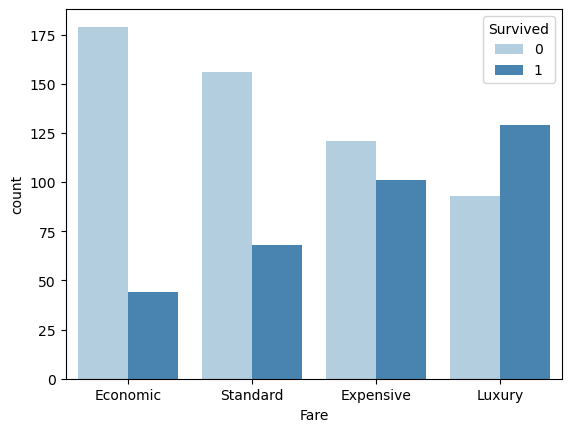

In [14]:
fare_cat = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4 ,labels = fare_cat)
sns.countplot(x = quartile_data, hue = train_df['Survived'], palette = 'Blues')

- hau het gia ve tu 0 - 100 dola
- gia ve cang cao ti le song sot cang cao 

# Feature Engineering 
- Dùng regex để lấy ra những đặc tính ẩn trong tên, các cột object....
- https://regex101.com/ : tool để lấy những regex expression.
- https://www.youtube.com/watch?v=YTpaSCTVACo : video hướng dẫn.


In [15]:
import re

In [16]:
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name)) 
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [17]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [18]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [19]:
test_df['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64

Family
- SibSp , Parch

In [20]:
# gop bien SibSp va Parch thanh bien Family_size
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

#bien doi no thanh ba loai single, small, medium, va large
train_df['Family_size'] = pd.cut(train_df['Family_size'], bins =[0,1,4,6,20], labels = ['Single','Small','Medium','Large'] )
test_df['Family_size'] = pd.cut(test_df['Family_size'], bins =[0,1,4,6,20], labels = ['Single','Small','Medium','Large'] )

<Axes: xlabel='Family_size', ylabel='count'>

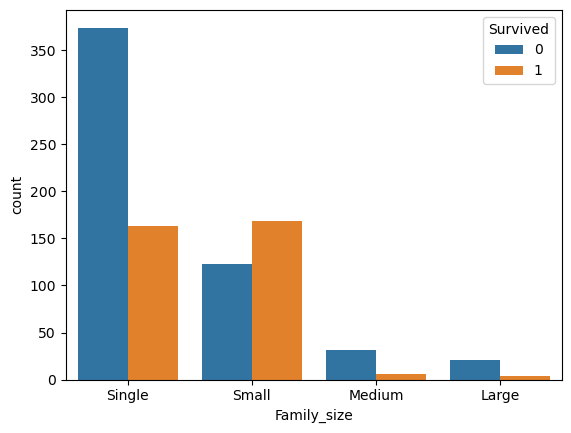

In [21]:
sns.countplot(data = train_df, x = 'Family_size', hue = 'Survived')

# Data Wrangling
- xu ly giu lieu (preprocessing)

In [22]:
num_features = ['Age','Fare']
cat_features = ['Pclass','Sex', 'Family_size' ,'Embarked', 'Title'] 
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Pclass', 'Sex', 'Family_size', 'Embarked', 'Title']


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    category
 11  Title        891 non-null    object  
 12  Family_size  891 non-null    category
dtypes: category(7), float64(2), object(4)
memory usage: 56.2+ KB


- age mising 177 values
- Embarked missing 2 values
Not too much missing value so we can fill it with median

In [24]:
# age:its is expected that age has correlation with Pclass and Sex so we will test it 

In [25]:
age_sex_class = train_df.groupby(['Sex','Pclass']).median()['Age']

C:\Users\pc\AppData\Local\Temp\ipykernel_21048\1211284896.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_sex_class = train_df.groupby(['Sex','Pclass']).median()['Age']


In [26]:
age_sex_class

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [27]:
#Fill in the null value in Age collumn by the median above

train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_21048\2172903138.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
C:\Users\pc\AppData\Local\Temp\ipykernel_21048\2172903138.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(.

In [28]:
# prepare data
x_train = train_df[feature_cols]
y_train = train_df['Survived']
x_test = test_df[feature_cols]

In [29]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numerical_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

In [30]:
preprocessor.fit(x_train)
preprocessor.fit(x_test)

ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Family_size', 'Embarked',
                                  'Title'])])

In [31]:
x_train = preprocessor.transform(x_train)
x_test = preprocessor.transform(x_test)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2)

In [33]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [34]:
# training model
# model1 : use logistic regression for binary classification

In [35]:
from sklearn.metrics import mean_absolute_error, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [36]:
# create and fit model
model = LogisticRegression(solver = 'liblinear', max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [37]:
# accuracy (%)
model.score(x_val, y_val)

0.8547486033519553

In [38]:
# mean absolute error
y_pred = model.predict(x_val)
score = mean_absolute_error(y_val, y_pred)
print('MAE:' ,score)

MAE: 0.1452513966480447


In [39]:
# Precision = TP / (TP + FP) True positive, false positive
# Precision measures the accuracy of positive predictions made by the classifier.
# Precision score ranges from 0 to 1

# Recall = TP / (TP + FN) false negative
# It is calculated as the ratio of true positive predictions to the total number of actual positive instances in the dataset.
#Recall score also ranges from 0 to 1
# 
precision_score(y_val, y_pred) , recall_score(y_val, y_pred)

(0.8285714285714286, 0.8055555555555556)

In [40]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       107
           1       0.83      0.81      0.82        72

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



precision: the model can predict not survived with 0.84 accuracy and survived case is 0.82


In [41]:
# model 2: polynomial
# change the x_train to fit the input of model

poly = PolynomialFeatures(degree = 2)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.transform(x_val)

In [42]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [43]:
poly_log_reg.score(poly_features_x_val, y_val)

0.8770949720670391

In [44]:
# model3: regression decision tree

In [45]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 0)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [46]:
decision_tree.score(x_val, y_val)

0.8603351955307262

# Cross validation
limit the loss of random pick train value

In [47]:
X = train_df[feature_cols]
y = train_df['Survived']
X = preprocessor.transform(X)


In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
log_reg_cv = LogisticRegression(solver = 'liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 0)

lr_score = cross_val_score(log_reg_cv, X, y,scoring = 'accuracy', cv = 5)
dt_score = cross_val_score(dt_cv, X, y,scoring = 'accuracy', cv = 5)

In [50]:
lr_score.mean(), lr_score.std()

(0.826031008725127, 0.020466357172416235)

In [51]:
dt_score.mean(), dt_score.std()

(0.8058753373925052, 0.01885333790777648)

# Baseline Model Comparision

In [52]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2024
models = [
    LinearSVC(max_iter = 150000, random_state = seed),
    SVC(random_state = seed),
    KNeighborsClassifier(metric = 'minkowski', p =2),
    LogisticRegression(solver = 'liblinear', max_iter = 1000),
    DecisionTreeClassifier(random_state = seed),
    RandomForestClassifier(random_state = seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = seed)
]

In [53]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv = 5, plot_results = False):
    #define k-fold
    kfold = StratifiedKFold(cv, shuffle=True, random_state = seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
        cv_df = pd.DataFrame(entries, columns=['model_name','fold_id','accuracy_score'])
        return cv_df
generate_baseline_results(models, X, y, metrics='accuracy', cv = 5, plot_results = False)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,model_name,fold_id,accuracy_score
0,LinearSVC,0,0.804469
1,LinearSVC,1,0.825843
2,LinearSVC,2,0.842697
3,LinearSVC,3,0.870787
4,LinearSVC,4,0.792135


# SUBMIT 

In [55]:
#submit 
x_test = test_df[feature_cols]
x_test = preprocessor.transform(x_test)
model1 = LogisticRegression(solver = 'liblinear', max_iter = 1000)
model1.fit(X,y)

pred_test = model1.predict(x_test)

# Save predictions in format used for competition scoring
x_test = test_df[feature_cols]
output = pd.DataFrame({'PassengerId': x_test.index,
                       'Survived': pred_test})
output.to_csv('submission.csv', index=False)